# Lets do some stuff.

In [58]:
# imports
import os, sys
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# Define isoform count_matrix, isoform annotation file, and other important files.
flairGTF    = "flair_combined_collapse.isoforms.gtf"
countMatrix = "../flair_counts_matrix.tsv"
suppaScript = "../SUPPA/suppa.py"
runFisher   = "/Users/csoulette/flair/bin/runFish.py"

In [8]:
# First lets make the splicing events files
# suppa2 software and manual can be retrieved here: 
# https://github.com/comprna/SUPPA

!python3 $suppaScript generateEvents -i $flairGTF -o events_SE -f ioe -e SE
!python3 $suppaScript generateEvents -i $flairGTF -o events_SS -f ioe -e SS
!python3 $suppaScript generateEvents -i $flairGTF -o events_MX -f ioe -e MX
!python3 $suppaScript generateEvents -i $flairGTF -o events_RI -f ioe -e RI
!python3 $suppaScript generateEvents -i $flairGTF -o events_FL -f ioe -e FL
!ls events*ioe

/usr/local/lib/python3.7/site-packages/sklearn/externals/joblib/externals/cloudpickle/cloudpickle.py:47: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  import imp
INFO:eventGenerator:Reading input data.
INFO:eventGenerator:Calculating events
INFO:eventGenerator:Done
/usr/local/lib/python3.7/site-packages/sklearn/externals/joblib/externals/cloudpickle/cloudpickle.py:47: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  import imp
INFO:eventGenerator:Reading input data.
INFO:eventGenerator:Calculating events
INFO:eventGenerator:Done
/usr/local/lib/python3.7/site-packages/sklearn/externals/joblib/externals/cloudpickle/cloudpickle.py:47: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  import imp
INFO:eventGenerator:Reading input data.
INFO:eventGenerator:Cal

In [12]:
# Ok. Now that events are made, lets run them through the fishers test script.
ioeFiles = [x for x in os.listdir() if "ioe" in x]
for f in ioeFiles:
    prefix = f.split("_")[2]
    !python3 $runFisher --count_matrix $countMatrix --out_prefix $prefix --ioe_table $f
    
!ls *v*.tsv

A3_42MGBAres_42MGBAres_batch1_v_42MGBA_42MGBA_batch1_fishersP.tsv
A3_T98G_T98G_batch1_v_42MGBA_42MGBA_batch1_fishersP.tsv
A3_T98G_T98G_batch1_v_42MGBAres_42MGBAres_batch1_fishersP.tsv
A5_42MGBAres_42MGBAres_batch1_v_42MGBA_42MGBA_batch1_fishersP.tsv
A5_T98G_T98G_batch1_v_42MGBA_42MGBA_batch1_fishersP.tsv
A5_T98G_T98G_batch1_v_42MGBAres_42MGBAres_batch1_fishersP.tsv
AF_42MGBAres_42MGBAres_batch1_v_42MGBA_42MGBA_batch1_fishersP.tsv
AF_T98G_T98G_batch1_v_42MGBA_42MGBA_batch1_fishersP.tsv
AF_T98G_T98G_batch1_v_42MGBAres_42MGBAres_batch1_fishersP.tsv
AL_42MGBAres_42MGBAres_batch1_v_42MGBA_42MGBA_batch1_fishersP.tsv
AL_T98G_T98G_batch1_v_42MGBA_42MGBA_batch1_fishersP.tsv
AL_T98G_T98G_batch1_v_42MGBAres_42MGBAres_batch1_fishersP.tsv
MX_42MGBAres_42MGBAres_batch1_v_42MGBA_42MGBA_batch1_fishersP.tsv
MX_T98G_T98G_batch1_v_42MGBA_42MGBA_batch1_fishersP.tsv
MX_T98G_T98G_batch1_v_42MGBAres_42MGBAres_batch1_fishersP.tsv
RI_42MGBAres_42MGBAres_batch1_v_42MGBA_42MGBA_batch1_fishersP.tsv
RI_T98G_T98G_b

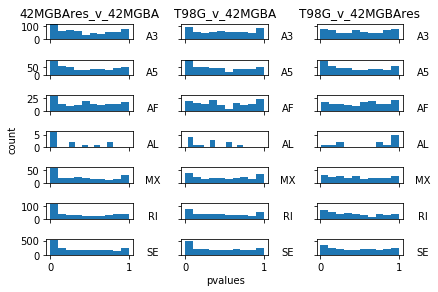

In [57]:
# First lets look at difference in pvalue distribution betwen the 3 pair-wise comparison

fishFiles = sorted([x for x in os.listdir() if "_v_" in x])

fig, axes = plt.subplots(int(len(fishFiles)/3),3, sharex='col', sharey='row')
axes = [x for y in axes for x in y]

for num, i in enumerate(axes):
    f = fishFiles[num]
    data = list()
    
    eventType  = f.split("_")[0]
    comparison = "%s_v_%s" % (f.split("_")[1], f.split("_")[5])

    if num<3:
        i.set_title(comparison, y=1.08)

    if  num+1 % 3:
        
        i.set_ylabel("%s" % eventType, rotation='horizontal', labelpad=20)
        i.yaxis.set_label_position("right")
        
    with open(f) as lines:
        next(lines) #header
        for l in lines:
            pval = float(l.split()[-2])
            data.append(pval)
    i.hist(data)

    
fig.text(0.5, 0.01, 'pvalues', ha='center', va='center')
fig.text(0.006, 0.5, 'count', ha='center', va='center',rotation=90)

plt.tight_layout()
plt.show()

## P-Value distribution
- Pvalues here represent the chance that the ratio of inclusion and exclusion counts for a particular splicing event between two conditions is "significantly" different.....
- The test were done in pair-wise comparisons (sample A vs sample B)
- The skew at 0 indicate how many tests returned a pvalue less than our "significance" threshold. 
- We can observe the change in skew down each column (event types) and across a row (sample comparison).
- If we look across a row, for each event type (mainly Skipped Exon), we notice that T98G_v_42MGBAres qualitatively has less of a skew toward 0 than the other two comparisons. I think this is similar to Rohams observation of the data so far, that the two samples seem to have less events that have significantly different events.
- Interestingly, the comparison group that has the largest number of differences is 42MGBAres_v_42MGBA, and the skew toward 0 for each event type seems to larger than the other comparison groups. ** Should be worth mentioning that this is qualitative, and "larger differences in skew size" represnet count differences (y-axis) of only a handful of events (from 10s of events to nearly a 100). 

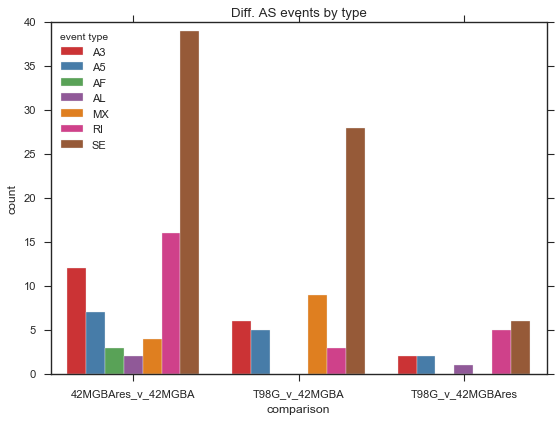

In [137]:
# Next lets look at number of differences by splicing type between each group
colors = ['27,158,119',
'217,95,2',
'117,112,179',
'231,41,138',
'102,166,30',
'230,171,2',
'166,118,29']
data = list()
for f in fishFiles:    
    eventType  = f.split("_")[0]
    comparison = "%s_v_%s" % (f.split("_")[1], f.split("_")[5])
    with open(f) as lines:
        next(lines) #header
        for l in lines:
            adjpval = float(l.split()[-1])
            if adjpval<0.05:
                data.append((eventType,comparison))

                
df = pd.DataFrame(data,columns=['event type','comparison'])
palette = sns.color_palette(['#e41a1c','#377eb8','#4daf4a','#984ea3','#ff7f00',"#e7298a",'#a65628'])
sns.countplot(data=df,x='comparison',hue='event type', palette=palette)
plt.title("Diff. AS events by type")
plt.show()

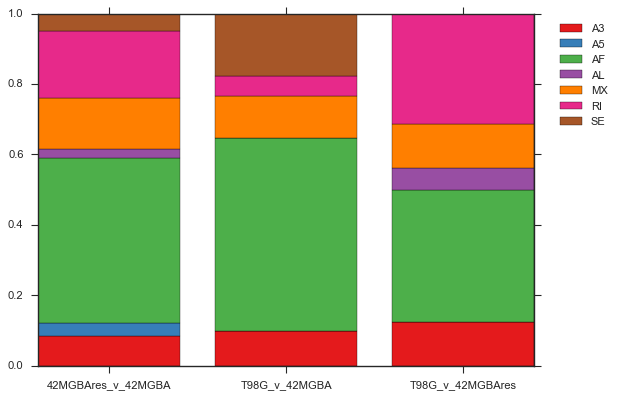

In [138]:
# now lets look at proportion
# Next lets look at number of differences by splicing type between each group

data = dict()
events = set()
for f in fishFiles:    
    eventType  = f.split("_")[0]
    comparison = "%s_v_%s" % (f.split("_")[1], f.split("_")[5])
    with open(f) as lines:
        next(lines) #header
        for l in lines:
            adjpval = float(l.split()[-1])
            if adjpval<0.05:
                if comparison not in data:
                    data[comparison] = dict()
                if eventType not in data[comparison]:
                    data[comparison][eventType] = 0
                data[comparison][eventType] += 1
                events.add(eventType)
            
# making stacked bar is so dumb....
data2 = dict()
labels = list()
for i,j in data.items():
    comp = i
    labels.append(i)
    eventSum = sum([x for x in j.values()])
    for event in events:
        eventCount = j.get(event,0)
        if event not in data2:
            data2[event] = list()
        data2[event].append(eventCount/eventSum)
        
        
plt.style.use('seaborn-ticks')
colors = ['#e41a1c','#377eb8','#4daf4a','#984ea3','#ff7f00',"#e7298a",'#a65628']

data2Labels = sorted(list(data2.keys()))
previous = np.zeros(3)
for num,i in enumerate(data2.keys()):
    if num==0:
        plt.bar(labels, data2[i], color=colors[num], edgecolor="black")
    else:
        plt.bar(labels, data2[i],bottom=previous, color=colors[num], edgecolor="black")
    previous = np.asarray(data2[i]) + previous
    
plt.legend(data2Labels, loc='upper center', bbox_to_anchor=(1.1, 1),
          fancybox=True, shadow=True, ncol=1)
plt.show()

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log10
  from ipykernel import kernelapp as app


(-1, 1)

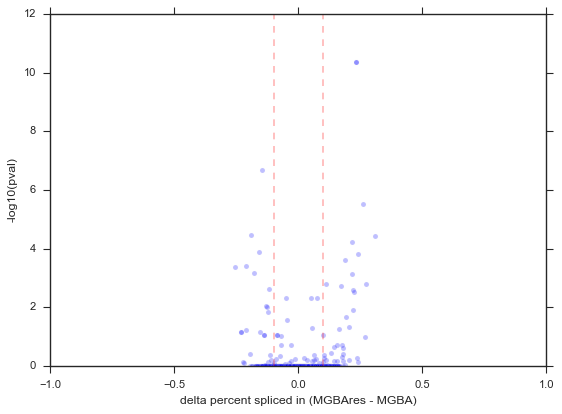

In [152]:
x = list() 
y = list()

with open('SE_42MGBAres_42MGBAres_batch1_v_42MGBA_42MGBA_batch1_fishersP.tsv') as l:
    next(l)
    for i in l:
        c = i.rstrip().split()
        p = float(c[-1])
        dpsi =  (float(c[-6]) / float(c[-5])) - (float(c[-4]) / float(c[-3]))
        x.append(dpsi)
        y.append(p)
        
x=np.asarray(x)
y=np.asarray(y)
plt.scatter(x=x,y=np.log10(y).dot(-1),alpha=0.25)
plt.xlabel("delta percent spliced in (MGBAres - MGBA)")
plt.ylabel("-log10(pval)")
plt.axvline(x=0.1, color="red", alpha=0.25, linestyle='--')
plt.axvline(x=-0.1, color="red", alpha=0.25, linestyle='--')
plt.ylim(0,12)
plt.xlim(-1,1)
